# Progetto d'esame per il corso Programmazione di Applicazioni Data Intensive - 2022/2023

<p>Pablo Sebastian Vargas Grateron - Mat: 0000970487</p>
<p>Sara Romeo - Mat: 0000969946</p>

## Obiettivo del progetto

L'obiettivo del progetto è stabilire un modello che possa stabilire il rischio di mortalità del paziente utilizzando... non so come continuare xd

## Import delle librerie

In [40]:
# Librerie standard
import os.path
from zipfile import ZipFile
import copy

# Librerie esterne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Caricamento dei dati 

Variabili utilizzate per il caricamento semplificato di dati.

In [41]:
zip_name = "archive.zip"
zip_link = "https://www.kaggle.com/datasets/meirnizri/covid19-dataset"
csv_name = "Covid Data.csv"

In [42]:
if not os.path.exists(zip_name):
    print("Error: Dataset not found, download id from " + zip_link)
else:
    with ZipFile(zip_name) as f:
        f.extractall()

In [43]:
with open(csv_name) as dataFile:
    data_raw = pd.read_csv(dataFile, sep=",")

Controlliamo le prime e ultime 5 righe con le apposite funzioni di pandas `head()` e `tail()`.

In [44]:
data_raw.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [45]:
data_raw.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


### Descrizione delle colonne

1. `USMER`: Indicates whether the patient treated medical units of the first, second or third level.
2. `MEDICAL_UNIT`: type of institution of the National Health System that provided the care.
3. `SEX`: 1 for female and 2 for male.
4. `PATIENT_TYPE`: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
5. `DATE_DIED`: If the patient died indicate the date of death, and 9999-99-99 otherwise.
6. `INTUBED`: whether the patient was connected to the ventilator.
7. `PNEUMONIA`: whether the patient already have air sacs inflammation or not.
8. `AGE`: of the patient.
9. `PREGNANCY`: whether the patient is pregnant or not.
10. `DIABETES`: whether the patient has diabetes or not.
11. `COPD`: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
12. `ASTHMA`: whether the patient has asthma or not.
13. `INMSUPR`: whether the patient is immunosuppressed or not.
14. `HYPERTENSION`: whether the patient has hypertension or not.
15. `OTHER_DISEASE`: whether the patient has other disease or not.
16. `CARDIOVASCULAR`: whether the patient has heart or blood vessels related disease.
17. `OBESITY`: whether the patient is obese or not.
18. `RENAL_CHRONIC`: whether the patient has chronic renal disease or not.
19. `TOBACCO`: whether the patient is a tobacco user.
20. `CLASSIFICATION_FINAL`: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
21. `ICU`: Indicates whether the patient had been admitted to an Intensive Care Unit.


## Analisi esplorativa e data cleaning

### Controlli iniziali del dataset

Per iniziare ad analizzare e pulire i dati, controlliamo i tipi di dati con il quale è strutturato il dataset. Questo ci permettera anche di correggere eventuali tipi di dati sbagliati.

In [46]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Procediamo a cambiare il tipo di dato della colonna `DATE_DIED` nel tipo di dato `datetime64`. Prima di cambiare il formato della data, modifichiamo le date che contengano esattamente il valore 9999-99-99, che rappresentano i pazienti che non sono morti.

In [47]:
data_raw.replace("9999-99-99", np.nan, inplace=True)
data_raw["DATE_DIED"] =  pd.to_datetime(data_raw["DATE_DIED"], format="%d/%m/%Y")

Il dataset fornito inizialmente non contiene valori nulli, ma le colonne binarie che assumono valori nel range di `97` e `99` devono essere interpretati come valori nulli.
Per trovare i valori nulli si procede a sostituire i numeri 97 e 99 con il valore `null` (Evitando di modificare la colonna `AGE`).

In [48]:
temp_data = copy.deepcopy(data_raw)
temp_data.drop("AGE", axis=1, inplace=True)
temp_data.replace(97, np.nan, inplace=True)
temp_data.replace(98, np.nan, inplace=True)
temp_data.replace(99, np.nan, inplace=True)
temp_data["AGE"] = data_raw["AGE"]

Riordiniamo i dati come erano inizialmente (Non è necessario, ma per non confonderci con il database iniziale), e poi memoriziamo il dataset pulito su una nuova variabile chiamata `data_clean`.

In [49]:
temp_data = temp_data.reindex(columns=["USMER", "MEDICAL_UNIT", "SEX", "PATIENT_TYPE", "DATE_DIED", "INTUBED", "PNEUMONIA", "AGE", "PREGNANT", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "OTHER_DISEASE", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO", "CLASIFFICATION_FINAL", "ICU"])
data_clean = temp_data

In [50]:
data_clean.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,2020-05-03,NaN,1.0,65,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,2,1,2020-06-03,NaN,1.0,72,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,2,2,2020-06-09,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,1,1,2020-06-12,NaN,2.0,53,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,2,1,2020-06-21,NaN,2.0,68,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


In [51]:
data_clean.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,NaT,NaN,2.0,40,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048571,1,13,2,2,NaT,2.0,2.0,51,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048572,2,13,2,1,NaT,NaN,2.0,55,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048573,2,13,2,1,NaT,NaN,2.0,28,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048574,2,13,2,1,NaT,NaN,2.0,52,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN


### Gestione dei dati nulli

Adesso che il dataset è correttamente impostato, controlliamo se ci sono valori nulli. Si puo osservare che particolarmente le colonne `DATA_DIED`, `INTUBED`, `PREGNANT` e `ICU` hanno un numero significativo di valori nulli. `DATA_DIED` presenta valori nulli dovuto al fatto che certe persone non sono morte, mentre `PREGNANT` dovuto al fatto della presenza di pazienti di sesso maschile.

In [52]:
data_clean.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               971633
INTUBED                 855869
PNEUMONIA                16003
AGE                          0
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

Procediamo a cambiare i valori `NaN` presenti nella colonna `PREGNANT` per ogni maschio con il valore `2` (Equivalente a `False`).

In [53]:
data_clean["PREGNANT"] = np.where((data_clean['SEX'] == 2) & (data_clean['PREGNANT'].isnull()), 2, data_clean['PREGNANT'])

Eliminiamo anche le colonne `INTUBED` e `ICU` dovuto al fatto che ci sono troppi valori `NaN`, e fare uso di qualche metodo per completare queste colonne potrebbe compromettere la precisione del modello.

In [54]:
data_clean.drop("INTUBED", axis=1, inplace=True)
data_clean.drop("ICU", axis=1, inplace=True)

Adesso che le colonne con valori `NaN` significativi sono state rimosse, considerando la dimensione del dataset di 1.048.575 righe, procediamo a eliminare i valori nulli delle altre colonne.

In [55]:
data_clean.dropna(subset=['PREGNANT', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO'], inplace=True)

Per lo sviluppo del modello ci interessa capire se i pazienti sono morti o ancora vivi. Per questo, si utilizza la colonna `DATE_DIED` per definire una nuova colonna booleana `DECEASED` e procediamo a eliminare la colonna `DATE_DIED` dovuto al fatto che la dimensione temporale non è utile per questo progetto.

In [56]:
data_clean['DECEASED'] = np.where(data_clean['DATE_DIED'].isnull(), 2, 1)
data_clean.drop("DATE_DIED", axis=1, inplace=True)

Adesso che tutti i valori del dataset sono stati gestiti, controlliamo nuovamente i valori `null` del dataset e poi usiamo la funzione `describe()` per ottenere ulteriori dati riguardanti al dataset e le sue feature.

In [57]:
data_clean.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
DECEASED                0
dtype: int64

In [58]:
data_clean.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DECEASED
count,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06
mean,1.642009e+00,8.987361e+00,1.500927e+00,1.187472e+00,1.865591e+00,4.189535e+01,1.992328e+00,1.880455e+00,1.985951e+00,1.970238e+00,1.986734e+00,1.844163e+00,1.973498e+00,1.980346e+00,1.846773e+00,1.982074e+00,1.919237e+00,5.291434e+00,1.926948e+00
std,4.794098e-01,3.724244e+00,4.999994e-01,3.902901e-01,3.410915e-01,1.674953e+01,8.725552e-02,3.244286e-01,1.176940e-01,1.699299e-01,1.144135e-01,3.627011e-01,1.606215e-01,1.388085e-01,3.602059e-01,1.326828e-01,2.724710e-01,1.889546e+00,2.602212e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00
50%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,1.210000e+02,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00


### Analisi esplorativa

#### Distribuzione delle strutture, attenzione medica e casi registrati di Covid-19

Per analizzare i casi di Covid-19, utilizziamo la colonna `CLASSIFICATION_FINAL`, la quale ha numeri in un range da 1 a 7, dove i numeri da 1 a 3 rappresentano i casi positivi. Generiamo una nuova colonna chiamata `RESULT` la quale conterra `1` se il paziente è positivo, `0` altrimenti.

In [59]:
data_clean["RESULT"] = np.where(data_clean['CLASIFFICATION_FINAL'] < 4, 1, 2)

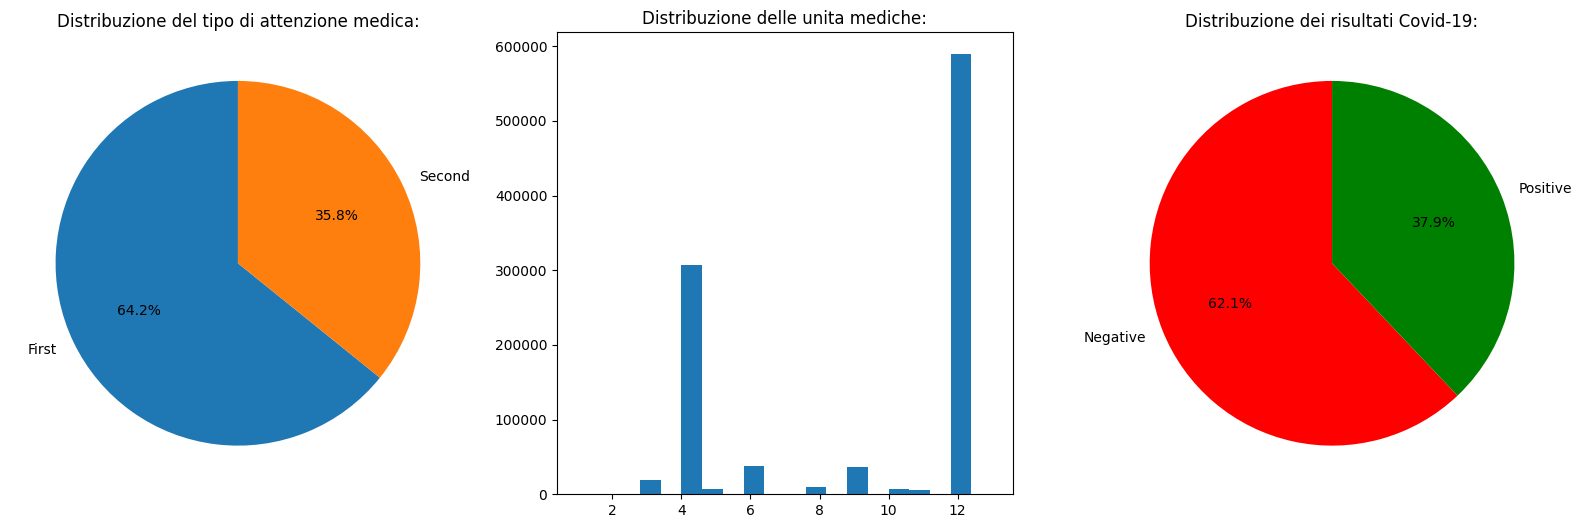

In [60]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1).pie(data_clean["USMER"].value_counts(), labels = ["First", "Second"], startangle=90, autopct='%1.1f%%')
plt.title('Distribuzione del tipo di attenzione medica:');

plt.subplot(1, 3, 2).hist(data_clean["MEDICAL_UNIT"], bins=20)
plt.title('Distribuzione delle unita mediche:');

plt.subplot(1, 3, 3).pie(data_clean["RESULT"].value_counts(), labels = ["Negative", "Positive"],  colors = data_clean["SEX"].map({1:"red", 2:"green"}), startangle=90, autopct='%1.1f%%')
plt.title('Distribuzione dei risultati Covid-19:');

Questa rappresentazione ci mostra il tipo di attenzione medica con il quale il paziente è stato trattato (`USMER`) e l'unita medica nel quale è stato trattato (`MEDICAL_UNIT`). Il primo grafico mostra come 1/3 dei pazienti hanno ricevuto attenzione medica importante, mentre nel secondo grafico si può osservare che l'unita medica 12 è quella che ha trattato gran parte dei pazienti, insieme all'unità 4.

Si può anche osservare come il tipo di attenzione medica è leggermente correlato al esito di positività del Covid-19.

#### Distribuzione dell'eta dei pazienti, sesso e gravidanza

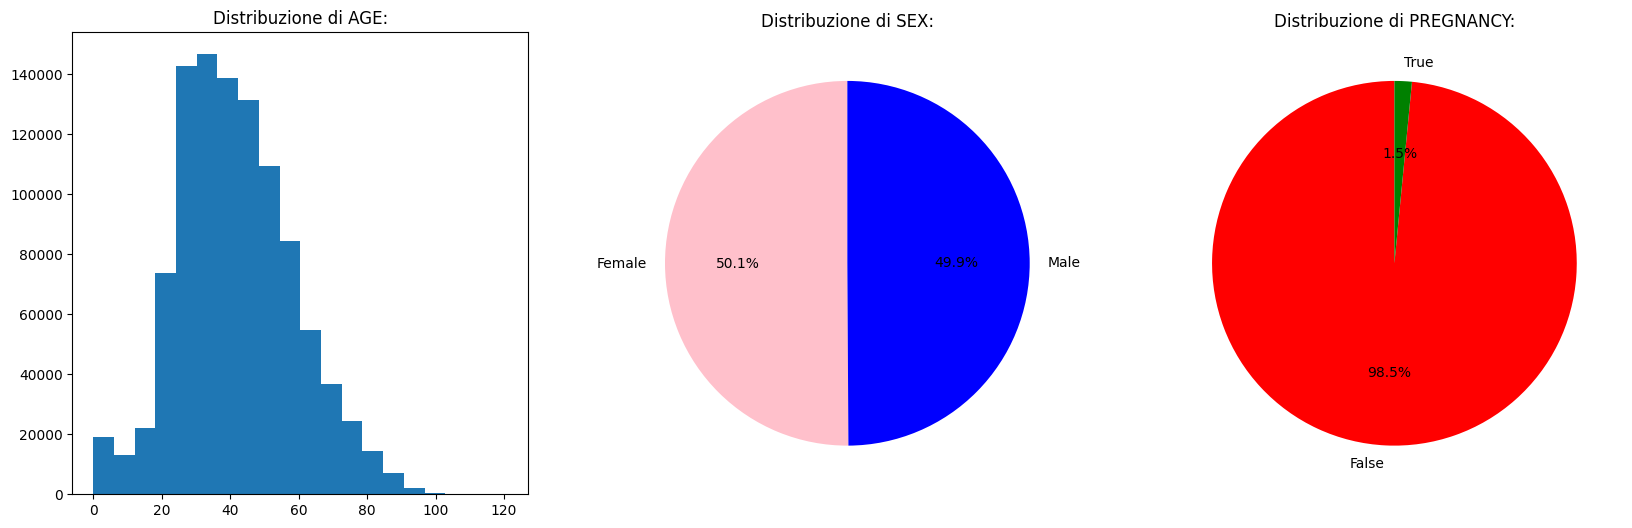

In [61]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1).hist(data_clean["AGE"], bins=20)
plt.title('Distribuzione di AGE:');

plt.subplot(1, 3, 2).pie(data_clean["SEX"].value_counts(), labels = ["Female", "Male"], colors = data_clean["SEX"].map({1:"pink", 2:"blue"}), startangle=90, autopct='%1.1f%%')
plt.title('Distribuzione di SEX:');

plt.subplot(1, 3, 3).pie(data_clean.loc[data_clean["SEX"] == 1]["PREGNANT"].value_counts(), labels = ["False", "True"], colors = data_clean["SEX"].map({1:"red", 2:"green"}), startangle=90, autopct='%1.1f%%')
plt.title('Distribuzione di PREGNANCY:');


In questi grafici possiamo osservare che il dataset contiene pazienti che in gran parte sono contenuti nel range di 20 e 60 anni d'età. Mentre la distribuzione del sesso è bilanciata, la distribuzione della gravidanza sulle donne è significativamente sbilanciata, dimostrando che solo il 1.5% delle donne è in gravidanza.

#### Distribuzione delle malattie, sintomi e complicazioni mediche

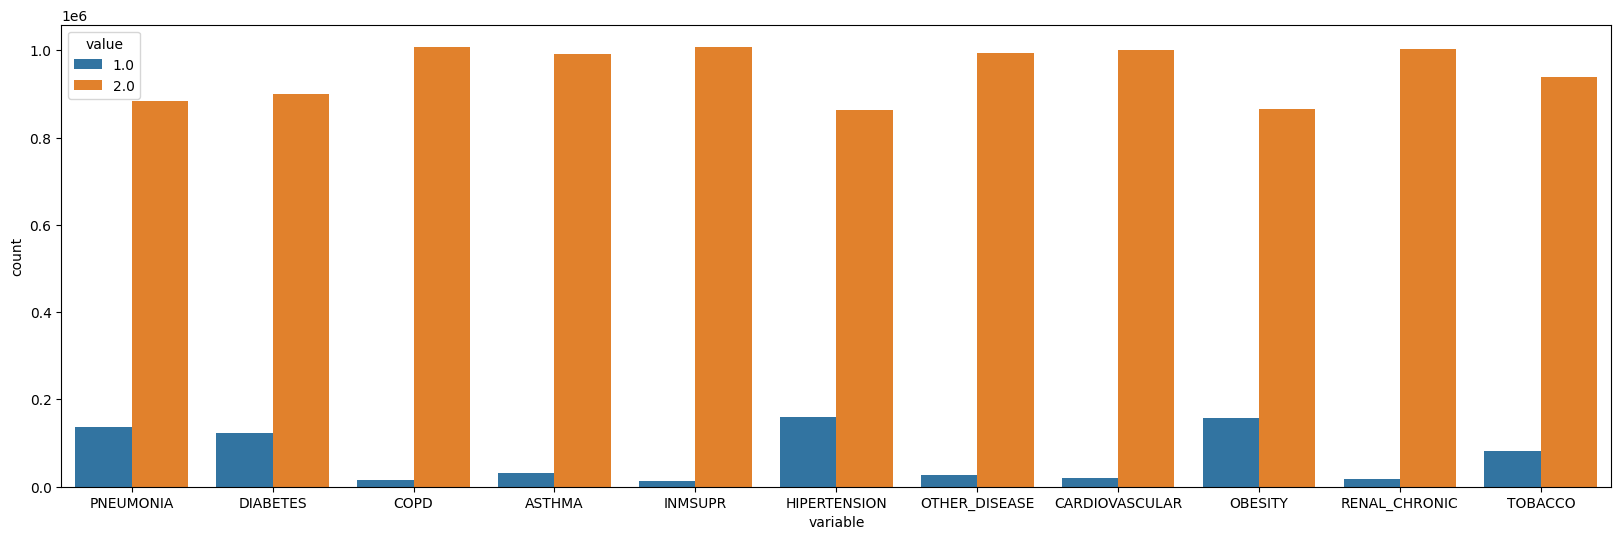

In [62]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 6

df_categorical = data_clean.loc[:, ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']]
sns.countplot(x="variable", hue="value", data= pd.melt(df_categorical));

Possiamo osservare che il dataset contiene quantita minori a 200.000 riguardanti a pazienti con malattie di ogni tipo. 

#### Distribuzione della variabile target

Osserviamo la distribuzione della feature obiettivo `DECEASED`.

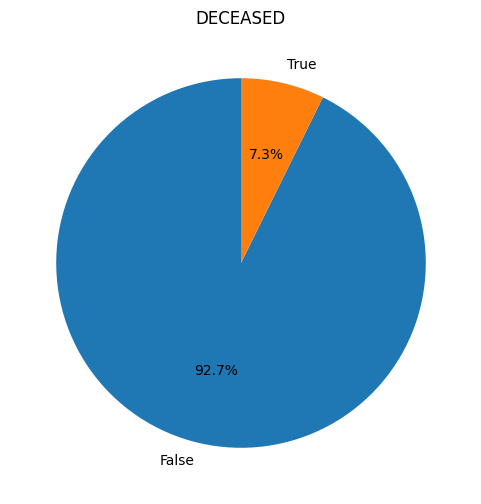

In [63]:
data_clean['DECEASED'].value_counts().plot.pie(labels = ["False", "True"], startangle=90, autopct='%1.1f%%', title="DECEASED", ylabel="");

Il dataset è signicativamente sbilanciato, con il 92.7% dei pazienti che non sono deceduti. Questo comportera l'utilizzo di tecniche di bilanciamento delle classi nei step successivi.

#### Relazione tra l'età, sesso e deceduti

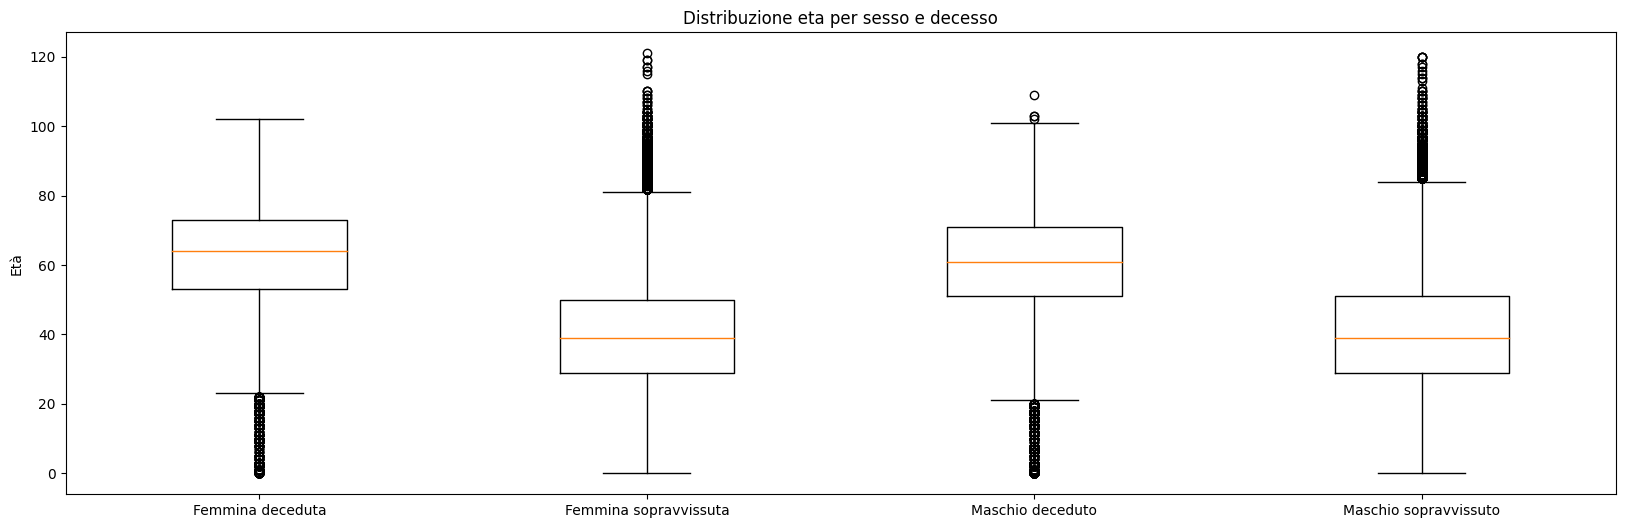

In [64]:
plt.figure(figsize=(20, 6))
plt.boxplot([data_clean.loc[(data_clean["DECEASED"] == 1) & (data_clean["SEX"] == 1)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 2) & (data_clean["SEX"] == 1)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 1) & (data_clean["SEX"] == 2)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 2) & (data_clean["SEX"] == 2)]['AGE']])
plt.title('Distribuzione eta per sesso e decesso')
plt.xticks([1, 2, 3, 4], ['Femmina deceduta', 'Femmina sopravvissuta', 'Maschio deceduto', 'Maschio sopravvissuto'])
plt.ylabel('Età');

Si nota che la maggior parte di persone decedute sono comprese tra i 50 e 80 anni d'età. Qua si puo osservare che la correlazione con la morte è legata più all'età che con il sesso, gia che entrambi sessi presentano risultati simili.

Non controlliamo la relazione con le donne in gravidanza dovuto al fatto che non ci sono decedute in gravidanza.

In [65]:
len(data_clean.loc[(data_clean["DECEASED"] == 1) & (data_clean["SEX"] == 2) & (data_clean["PREGNANT"] == 1)])

0

#### Relazione tra le complicazioni polmonari, cardiopatie e deceduti

Dall'informazione estratta nel paper **Position paper ANMCO: Malattie del circolo polmonare e COVID-19** (https://www.giornaledicardiologia.it/archivio/3405/articoli/33888/), il rischio di morte dato dal Covid-19 può essere molto correlato con cardiopatie e malattie polmonari. Data questa informazione, possiamo analizzare la relazione tra le colonne `PNEUMONIA`, `ASTHMA`, `HIPERTENSION` e `CARDIOVASCULAR`.

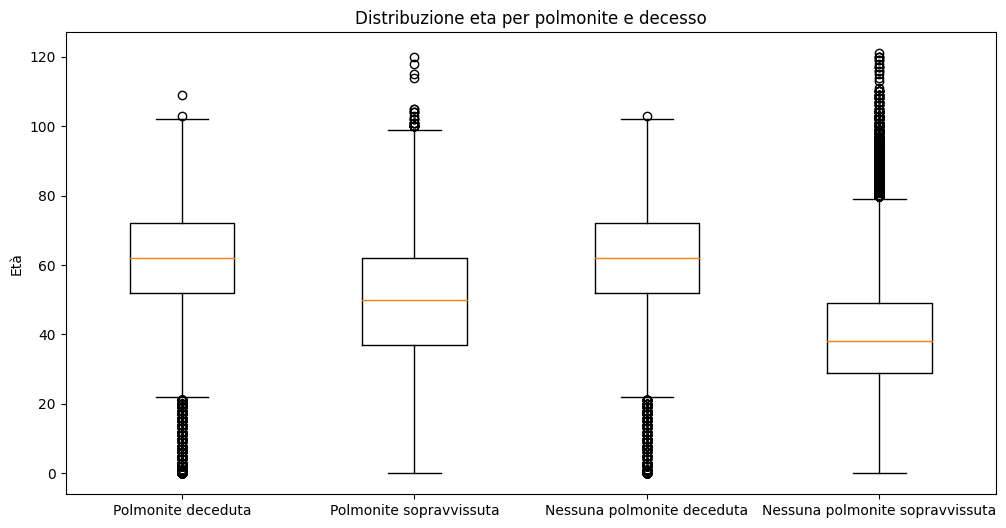

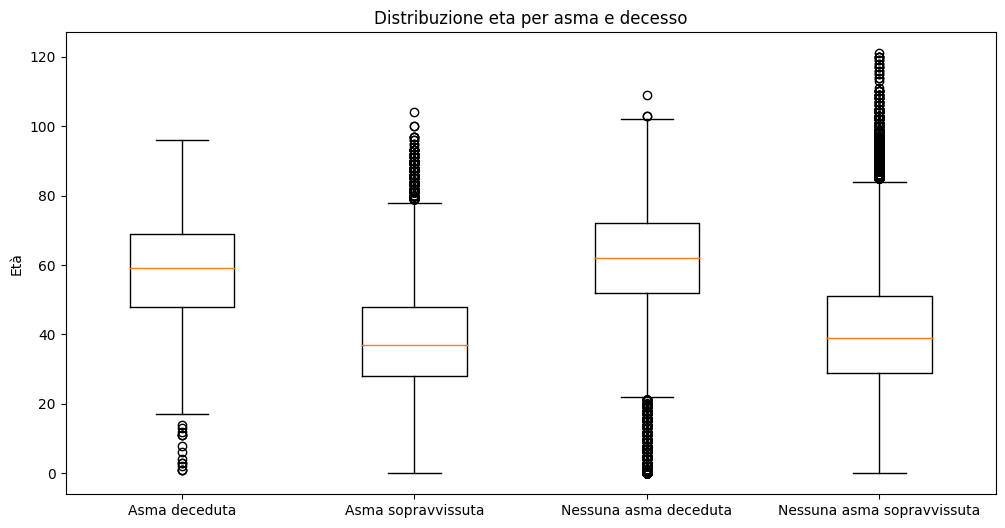

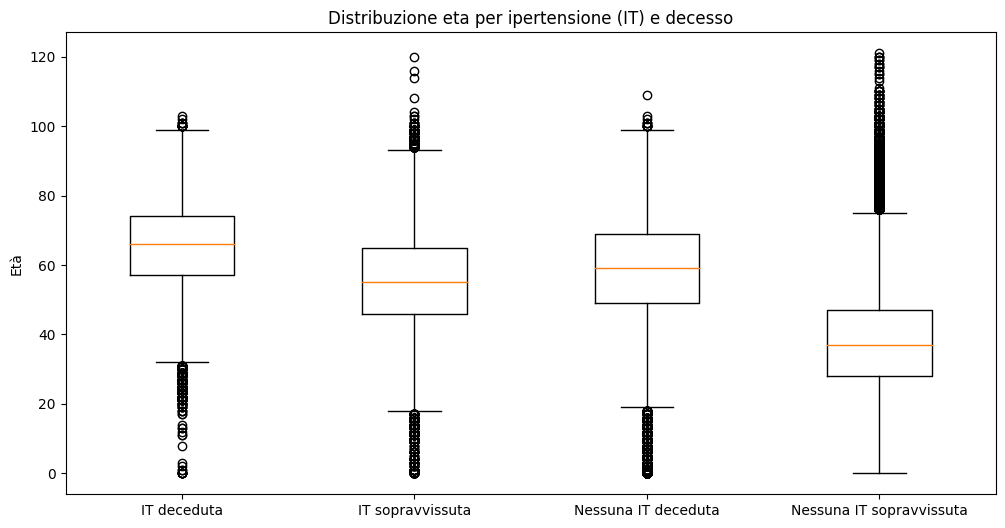

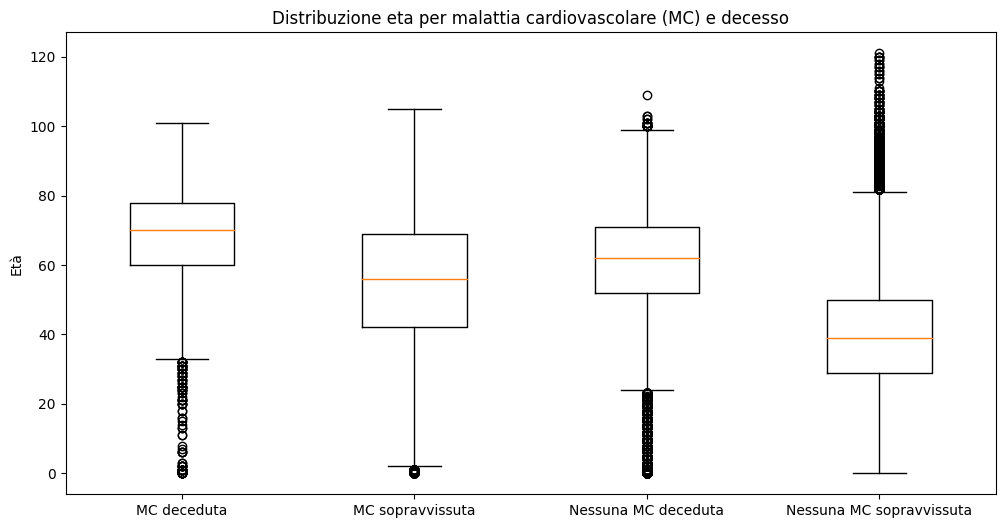

In [66]:
plt.figure(figsize=(12, 6))
plt.boxplot([data_clean.loc[(data_clean["DECEASED"] == 1) & (data_clean["PNEUMONIA"] == 1)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 2) & (data_clean["PNEUMONIA"] == 1)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 1) & (data_clean["PNEUMONIA"] == 2)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 2) & (data_clean["PNEUMONIA"] == 2)]['AGE']])
plt.title('Distribuzione eta per polmonite e decesso')
plt.xticks([1, 2, 3, 4], ['Polmonite deceduta', 'Polmonite sopravvissuta', 'Nessuna polmonite deceduta', 'Nessuna polmonite sopravvissuta'])
plt.ylabel('Età');

plt.figure(figsize=(12, 6))
plt.boxplot([data_clean.loc[(data_clean["DECEASED"] == 1) & (data_clean["ASTHMA"] == 1)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 2) & (data_clean["ASTHMA"] == 1)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 1) & (data_clean["ASTHMA"] == 2)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 2) & (data_clean["ASTHMA"] == 2)]['AGE']])
plt.title('Distribuzione eta per asma e decesso')
plt.xticks([1, 2, 3, 4], ['Asma deceduta', 'Asma sopravvissuta', 'Nessuna asma deceduta', 'Nessuna asma sopravvissuta'])
plt.ylabel('Età');

plt.figure(figsize=(12, 6))
plt.boxplot([data_clean.loc[(data_clean["DECEASED"] == 1) & (data_clean["HIPERTENSION"] == 1)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 2) & (data_clean["HIPERTENSION"] == 1)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 1) & (data_clean["HIPERTENSION"] == 2)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 2) & (data_clean["HIPERTENSION"] == 2)]['AGE']])
plt.title('Distribuzione eta per ipertensione (IT) e decesso')
plt.xticks([1, 2, 3, 4], ['IT deceduta', 'IT sopravvissuta', 'Nessuna IT deceduta', 'Nessuna IT sopravvissuta'])
plt.ylabel('Età');

plt.figure(figsize=(12, 6))
plt.boxplot([data_clean.loc[(data_clean["DECEASED"] == 1) & (data_clean["CARDIOVASCULAR"] == 1)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 2) & (data_clean["CARDIOVASCULAR"] == 1)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 1) & (data_clean["CARDIOVASCULAR"] == 2)]['AGE'],
            data_clean.loc[(data_clean["DECEASED"] == 2) & (data_clean["CARDIOVASCULAR"] == 2)]['AGE']])
plt.title('Distribuzione eta per malattia cardiovascolare (MC) e decesso')
plt.xticks([1, 2, 3, 4], ['MC deceduta', 'MC sopravvissuta', 'Nessuna MC deceduta', 'Nessuna MC sopravvissuta'])
plt.ylabel('Età');

Si puo osservare come le prime due malattie, le quali sono relative a malattie respiratorie (`PNEUMONIA` e `ASTHMA`) mostrano che gran parte dei decessi sono dipendenti dall'età dei pazienti, mentre le ultime due malattie (`HIPERTENSION` e `CARDIOVASCULAR`) mostrano dei leggeri cambiamenti rispetto a chi soffre le malattie, affermando che ci sono piu pazienti con malattie cardiovascolari che sono sopravissuti in età maggiori che con malattie polmonari.

#### Correlazione tra tutte le features generali del dataset

Finalmente, per avere una panoramica delle feature più precisa e completa, facciamo un calcolo della correlazione tra tutte le features esistenti.

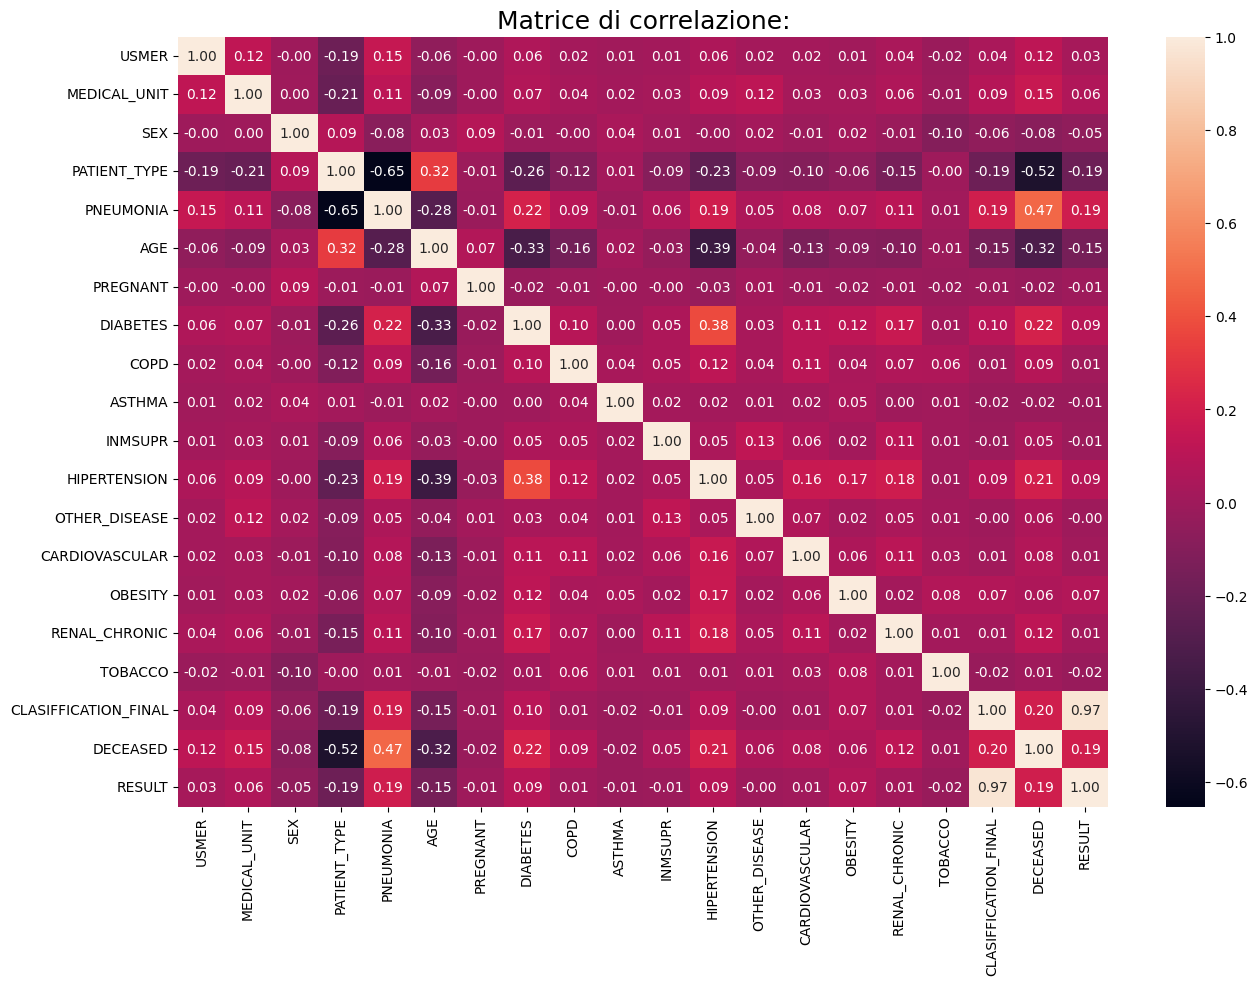

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(data_clean.corr(), annot=True, fmt=".2f")
plt.title("Matrice di correlazione:", fontsize=18);

## Addestramento e analisi dei modelli

### Preparazione del dataset

Scartiamo i dati che hanno bassa correlazione con la variabile target `DECEASED`. Abbiamo scelto le variabili che sono comprese tra **0.1 > X > -0.1** nella matrice di correlazione, cioè le colonne `SEX`, `PREGNANT`, `COPD`, `ASTHMA`, `INMSUPR`, `OTHER_DISEASE`, `CARDIOVASCULAR`, `OBESITY`, `TOBACCO`.

In [68]:
data_clean.drop(["SEX", "PREGNANT", "COPD", "ASTHMA", "INMSUPR", "OTHER_DISEASE", "CARDIOVASCULAR", "OBESITY", "TOBACCO"], axis=1, inplace=True)

Come accennato nella sezione anteriore, il dataset è significativamente sbilanciato, dimostrando che solo il 7.3% dei pazienti sono deceduti. Procediamo ad utilizzare tecniche di bilanciamento per il dataset utilizzando i metodi di resampling come l'oversampling e l'undersampling per poi testare con entrambe le tipologie di bilanciamento i risultati dei diversi modelli.

La libreria utilizzata per il bilanciamento del dataset è `imbalanced-learn`.

#### Bilanciamento del dataset con il metodo di oversampling

Come metodo di oversampling utilizzeremo il metodo **SMOTE: Synthetic Minority Over-sampling Technique** (https://arxiv.org/abs/1106.1813) per generare nel caso di questo problema, pazienti che siano decessi.

In [69]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_over, Y_over = oversample.fit_resample(data_clean.drop("DECEASED", axis=1), data_clean["DECEASED"])
print("Dimensione oversampling: " + str(len(X_over)))

Dimensione oversampling: 1894640


Come possiamo osservare, il dataset è quasi raddoppiato in dimensioni, successivamente possiamo osservare come il dataset è bilanciato.

In [70]:
Y_over.value_counts()

DECEASED
1    947320
2    947320
Name: count, dtype: int64

Procediamo a generare il training set e il test set con il dataset generato dal oversampling.

In [71]:
from sklearn.model_selection import train_test_split

data_over = pd.concat([X_over, Y_over], axis=1)
train_set, test_set = train_test_split(data_over, test_size=0.2, random_state=42)

x_over_train = train_set.drop(columns=["DECEASED"])
y_over_train = train_set["DECEASED"]
x_over_test = test_set.drop(columns=["DECEASED"])
y_over_test = test_set["DECEASED"]

#### Bilanciamento del dataset con il metodo di  undersampling

Con il metodo di undersampling, cancelleremo dati riguardanti ai pazienti vivi, per generare un nuovo dataset più piccolo, ma con i dati tra pazienti vivi e morti bilanciati.

In [72]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()
X_under, Y_under = undersample.fit_resample(data_clean.drop("DECEASED", axis=1), data_clean["DECEASED"])
print("Dimensione undersampling: " + str(len(X_under)))

Dimensione undersampling: 149314


Il dataset è stato significativamente ridotto, ma come possiamo osservare successivamente, i pazienti deceduti sono bilanciati.

In [73]:
Y_under.value_counts()

DECEASED
1    74657
2    74657
Name: count, dtype: int64

Procediamo a generare il training set e il test set con il dataset generato dal undersampling.

In [74]:
from sklearn.model_selection import train_test_split

data_under = pd.concat([X_under, Y_under], axis=1)
train_set, test_set = train_test_split(data_under, test_size=0.2, random_state=42)

x_under_train = train_set.drop(columns=["DECEASED"])
y_under_train = train_set["DECEASED"]
x_under_test = test_set.drop(columns=["DECEASED"])
y_under_test = test_set["DECEASED"]

### Addestramento dei modelli

Definiamo le funzioni per il calcolo delle valutazioni dei modelli successivi.

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def print_eval(X, y, model):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    re = relative_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"   Mean squared error: {mse:.5}")
    print(f"       Relative error: {re:.5%}")
    print(f"R-squared coefficient: {r2:.5}")

#### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
logreg_model_over = LogisticRegression(solver="saga", random_state=42)
logreg_model_under = LogisticRegression(solver="saga", random_state=42)

Procediamo con il training del dataset con **oversampling** e **undersampling**.

In [77]:
logreg_model_over.fit(x_over_train, y_over_train)
logreg_model_under.fit(x_under_train, y_under_train)

c:\Users\pseba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=42, solver='saga')

Finalmente osserviamo i risultati sia nel training set che nel test set del oversampling e undersampling.

In [82]:
print("Misure di precisione sul training set:")
print("\nOversampling:")
print_eval(x_over_train, y_over_train, logreg_model_over)
print("\nUndersampling:")
print_eval(x_under_train, y_under_train, logreg_model_under)
print("\n")
print("Misure di precisione sul test set:")
print("\nOversampling:")
print_eval(x_over_test, y_over_test, logreg_model_over)
print("\nUndersampling:")
print_eval(x_under_test, y_under_test, logreg_model_under)

Misure di precisione sul training set:

Oversampling:
   Mean squared error: 0.095194
       Relative error: 6.79219%
R-squared coefficient: 0.61922

Undersampling:
   Mean squared error: 0.093687
       Relative error: 6.67135%
R-squared coefficient: 0.62525


Misure di precisione sul test set:

Oversampling:
   Mean squared error: 0.094659
       Relative error: 6.75379%
R-squared coefficient: 0.62136

Undersampling:
   Mean squared error: 0.096507
       Relative error: 6.90319%
R-squared coefficient: 0.61397


#### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtree_model_over = DecisionTreeClassifier()
dtree_model_under = DecisionTreeClassifier()

Procediamo con il training del dataset con **oversampling** e **undersampling**.

In [85]:
dtree_model_over.fit(x_over_train, y_over_train)
dtree_model_under.fit(x_under_train, y_under_train)

DecisionTreeClassifier()

Finalmente osserviamo i risultati sia nel training set che nel test set del oversampling e undersampling.

In [86]:
print("Misure di precisione sul training set:")
print("\nOversampling:")
print_eval(x_over_train, y_over_train, dtree_model_over)
print("\nUndersampling:")
print_eval(x_under_train, y_under_train, dtree_model_under)
print("\n")
print("Misure di precisione sul test set:")
print("\nOversampling:")
print_eval(x_over_test, y_over_test, dtree_model_over)
print("\nUndersampling:")
print_eval(x_under_test, y_under_test, dtree_model_under)

Misure di precisione sul training set:

Oversampling:
   Mean squared error: 0.061907
       Relative error: 3.80184%
R-squared coefficient: 0.75237

Undersampling:
   Mean squared error: 0.062251
       Relative error: 3.80533%
R-squared coefficient: 0.75099


Misure di precisione sul test set:

Oversampling:
   Mean squared error: 0.066759
       Relative error: 4.14208%
R-squared coefficient: 0.73296

Undersampling:
   Mean squared error: 0.099889
       Relative error: 6.70562%
R-squared coefficient: 0.60044


#### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
rforest_model_over = RandomForestClassifier()
rforest_model_under = RandomForestClassifier()

Procediamo con il training del dataset con **oversampling** e **undersampling**.

In [88]:
rforest_model_over.fit(x_over_train, y_over_train)
rforest_model_under.fit(x_under_train, y_under_train)

RandomForestClassifier()

Finalmente osserviamo i risultati sia nel training set che nel test set del oversampling e undersampling.

In [89]:
print("Misure di precisione sul training set:")
print("\nOversampling:")
print_eval(x_over_train, y_over_train, rforest_model_over)
print("\nUndersampling:")
print_eval(x_under_train, y_under_train, rforest_model_under)
print("\n")
print("Misure di precisione sul test set:")
print("\nOversampling:")
print_eval(x_over_test, y_over_test, rforest_model_over)
print("\nUndersampling:")
print_eval(x_under_test, y_under_test, rforest_model_under)

Misure di precisione sul training set:

Oversampling:
   Mean squared error: 0.06191
       Relative error: 3.83100%
R-squared coefficient: 0.75236

Undersampling:
   Mean squared error: 0.06226
       Relative error: 3.98950%
R-squared coefficient: 0.75096


Misure di precisione sul test set:

Oversampling:
   Mean squared error: 0.06611
       Relative error: 4.11740%
R-squared coefficient: 0.73556

Undersampling:
   Mean squared error: 0.096206
       Relative error: 6.55159%
R-squared coefficient: 0.61517


#### Support Vector Machines (SVM)

#### K-Nearest Neighbors